<a href="https://colab.research.google.com/github/satyakipal99/Data-Science-and-Business-Analyst-Internship-TSF/blob/main/Task_1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRIP @ The Sparks Foundation**

 Author: *Satyaki Pal*


Data Science and Business Analytics Intern

## **Linear Regression with Python**


### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [2]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Preprocessing and Cleaning of the data

In [7]:
df.shape

(25, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


There are no null values present in our data

In [13]:
df_dup = df.duplicated()
df_dup.sum()

0

There are no duplicate values present in our data

### Stats

In [10]:
df.describe(include="all")

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visualization

Visualizing Score density

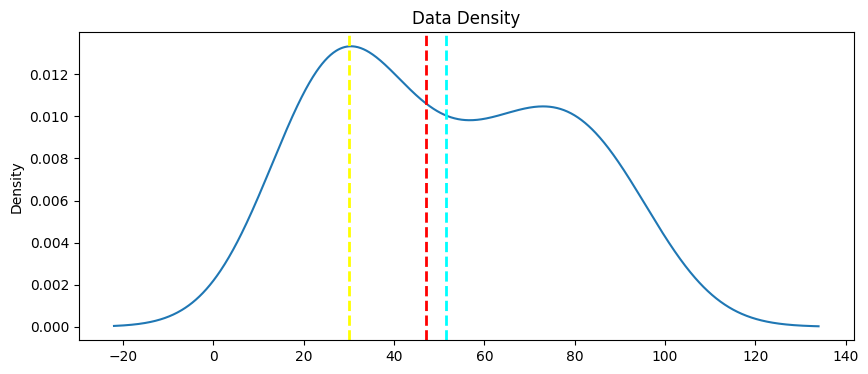

In [23]:
def show_density(var_data):
    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    plt.show()

col = df['Scores']
show_density(col)

Plotting scatter plot for understanding correlation between the columns

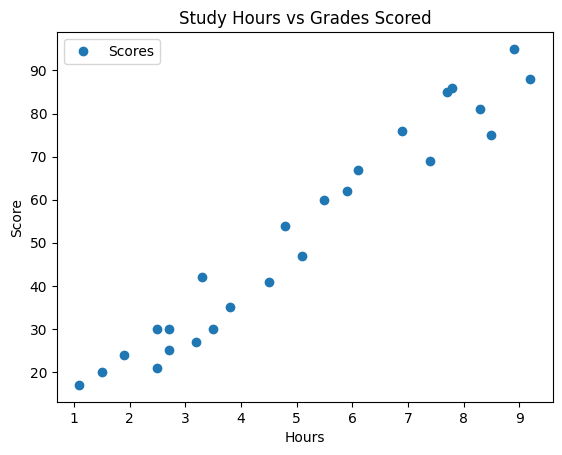

In [14]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')
plt.title('Study Hours vs Grades Scored')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [15]:
df.corr(method= 'pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Also from the correation coefficient matrix we can confirm that there is a positive relation between the number of hours studied and percentage of score.

## **Preparing the data for ML Model**



In [16]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

Now we split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

### **Training the Algorithm**


In [87]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print ('Slope: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Slope:  [9.68207815]
Intercept:  2.826892353899737


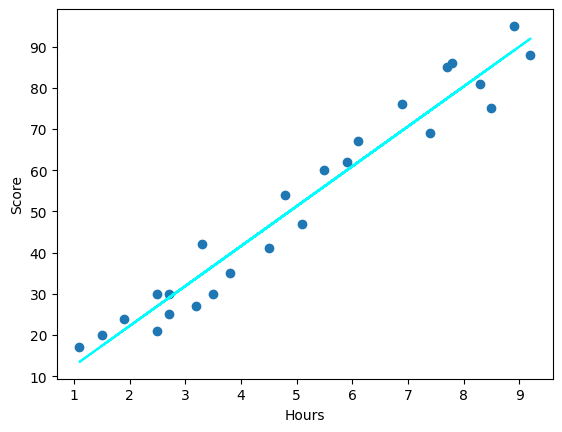

In [88]:
# Plotting the regression line
line = regr.coef_*X+regr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.xlabel('Hours')
plt.ylabel('Score')
plt.plot(X, line, color='cyan');
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [89]:
print(X_test) # Testing data - In Hours
y_pred = regr.predict(X_test) # Predicting the scores

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [90]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


## Predicting Scores for 9.25 hours of study

In [91]:
# You can also test with your own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regr.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494


**For 9.25 hours of study the predicted percentage scores is 92.39**

### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [92]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error: %.2f' % metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: %.2f' % metrics.mean_squared_error(y_test, y_pred))
print("R2-score: %.2f" % r2_score(y_test, y_pred))

Mean Absolute Error: 3.92
Mean Squared Error: 18.94
R2-score: 0.97


**The accuracy of the model is 97%**